In [7]:
# Plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Data and numerics
import pandas as pd
import numpy as np
import scipy as scp

# System
import os 
from datetime import datetime
import sys

# Utilities
import yaml
from itertools import product
import pickle
import uuid

# Tensorflow
import tensorflow as tf
from tensorflow import keras

# Own
#import make_data_wfpt as mdw
import cddm_data_simulation as cds
import boundary_functions as bf
import kde_training_utilities as kde_utils
import kde_class as kdec

In [8]:
# INITIALIZATIONS -------------------------------------------------------------
# INSERT HERE
machine = 'home' # put custom if you want to keep your network_path
model = 'ddm'

if machine == 'x7':
    stats = pickle.load(open("/media/data_cifs/afengler/git_repos/nn_likelihoods/kde_stats.pickle", "rb"))
    model_params = stats[model]
    output_folder = model_params['output_folder_x7']
    with open("model_paths_x7.yaml") as tmp_file:
        network_path = yaml.load(tmp_file)[model]
if machine == 'ccv':
    stats = pickle.load(open("/users/afengler/git_repos/nn_likelihoods/kde_stats.pickle", "rb"))
    model_params = stats[model]
    output_folder = model_params['output_folder']
    with open("model_paths.yaml") as tmp_file:
        network_path = yaml.load(tmp_file)[model]
if machine == 'home':
    stats = pickle.load(open("/users/afengler/OneDrive/git_repos/nn_likelihoods/kde_stats.pickle", "rb"))
    model_params = stats[model]
    output_folder = model_params['output_folder']
    with open("model_paths_home.yaml") as tmp_file:
        network_path = yaml.load(tmp_file)[model]

/Users/afengler/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [10]:
# Data template
# plot_data = np.zeros((4000, 2))
# plot_data[:, 0] = np.concatenate(([i * 0.01 for i in range(2000, 0, -1)], [i * 0.01 for i in range(1, 2001, 1)]))
# plot_data[:, 1] = np.concatenate((np.repeat(-1, 2000), np.repeat(1, 2000)))

# Load Keras model and initialize batch container
keras_model = keras.models.load_model(network_path + 'model_final.h5')

# keras_input_batch = np.zeros((4000, parameter_matrix.shape[1] + 2))
# keras_input_batch[:, parameter_matrix.shape[1]:] = plot_data
# keras_input_batch[:, :parameter_matrix.shape[1]] = parameter_matrix[i, :]
# keras_likelihood = np.exp(keras_model.predict(keras_input_batch))
        

In [22]:
# Data template
plot_data = np.zeros((4000, 2))
plot_data[:, 0] = np.concatenate(([i * 0.005 for i in range(2000, 0, -1)], [i * 0.005 for i in range(1, 2001, 1)]))
plot_data[:, 1] = np.concatenate((np.repeat(-1, 2000), np.repeat(1, 2000)))
    
n_levels = 100
n_params = 4
data_var_v = np.zeros((4000 * n_levels, n_params + 3))

cnt = 0 
for v_tmp in np.linspace(-2, 2, 10):
    tmp_begin = 4000 * cnt
    tmp_end = 4000 * (cnt + 1)
    data_var_v[tmp_begin:tmp_end, :4] = np.array([v_tmp, 1, 0.5, 0])
    data_var_v[tmp_begin:tmp_end, 4:(4 + 2)] = plot_data
    data_var_v[tmp_begin:tmp_end, (4 + 2)] = np.squeeze(np.exp(keras_model.predict(data_var_v[tmp_begin:tmp_end, :-1])))
    cnt += 1

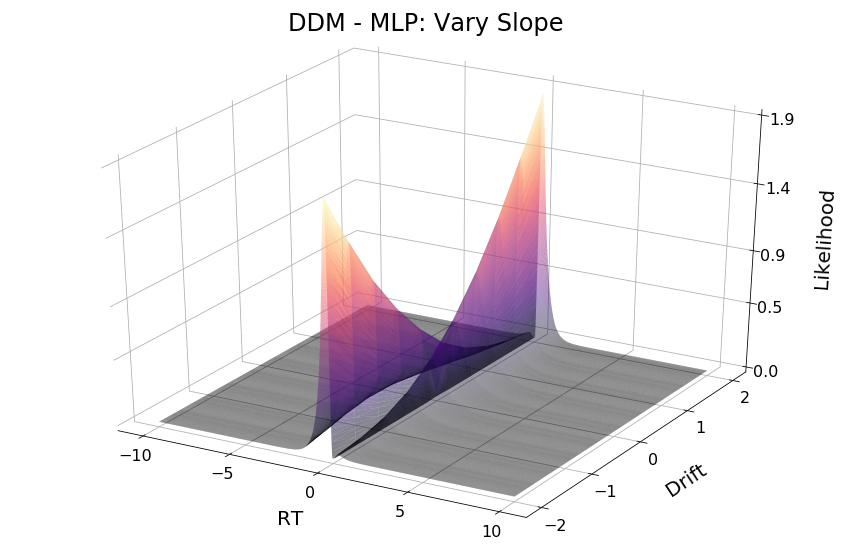

In [42]:
# Predict
plt.rcParams['figure.figsize'] = [15.0, 10.0]
fig = plt.figure()
#fig, (ax1, ax2) = plt.subplot(121)
# ax1 = fig.gca(projection = '3d')
# ax2 = fig.gca(projection = '3d')
axes = []
axes.append(fig.add_subplot(1,1,1, projection = '3d'))

axes[0].plot_trisurf(data_var_v[:, -2] * data_var_v[:, -3], 
                     data_var_v[:, 0], 
                     data_var_v[:, -1], 
                     linewidth = 0.2, alpha = 0.5, cmap = plt.cm.magma)
axes[0].set_ylabel('Drift',  
                   fontsize = 20, labelpad = 20)
axes[0].set_xlabel('RT',  
                   fontsize = 20, labelpad = 20)
axes[0].set_zlabel('Likelihood',  
                   fontsize = 20, labelpad = 20)
axes[0].set_zticks(np.round(np.linspace(0, max(data_var_v[:, -1]), 5), 1))
axes[0].set_yticks(np.round(np.linspace(min(data_var_v[:,0]), max(data_var_v[:, 0]), 5), 1))
axes[0].set_xticks(np.round(np.linspace(min(data_var_v[:, -2] * data_var_v[:, -3]), 
                                        max(data_var_v[:, -2] * data_var_v[:, -3]), 
                                        5), 
                            1))
axes[0].tick_params(labelsize = 16)
#axes[0].set_yticklabels(fontsize = 16)
#axes[0].set_zticklabels(fontsize = 16)

axes[0].set_title('DDM - MLP: Vary Slope', 
                  fontsize = 24, pad = 20)
axes[0].w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axes[0].w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axes[0].w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

In [51]:
# Data template
plot_data = np.zeros((4000, 2))
plot_data[:, 0] = np.concatenate(([i * 0.005 for i in range(2000, 0, -1)], [i * 0.005 for i in range(1, 2001, 1)]))
plot_data[:, 1] = np.concatenate((np.repeat(-1, 2000), np.repeat(1, 2000)))
    
n_levels = 10
n_params = 4
data_var_v = np.zeros((4000 * n_levels, n_params + 3))

cnt = 0 
for a_tmp in np.linspace(0.5, 2, n_levels):
    tmp_begin = 4000 * cnt
    tmp_end = 4000 * (cnt + 1)
    data_var_v[tmp_begin:tmp_end, :4] = np.array([0, a_tmp, 0.5, 0])
    data_var_v[tmp_begin:tmp_end, 4:(4 + 2)] = plot_data
    data_var_v[tmp_begin:tmp_end, (4 + 2)] = np.squeeze(np.exp(keras_model.predict(data_var_v[tmp_begin:tmp_end, :-1])))
    cnt += 1

In [47]:
np.linspace(0.5, 2, 10)

array([0.5       , 0.66666667, 0.83333333, 1.        , 1.16666667,
       1.33333333, 1.5       , 1.66666667, 1.83333333, 2.        ])

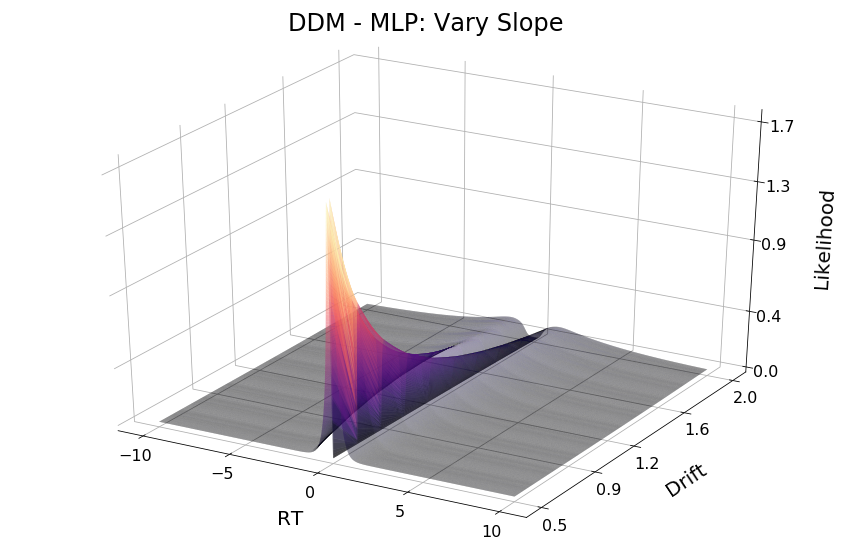

In [52]:
# Predict
plt.rcParams['figure.figsize'] = [15.0, 10.0]
fig = plt.figure()
#fig, (ax1, ax2) = plt.subplot(121)
# ax1 = fig.gca(projection = '3d')
# ax2 = fig.gca(projection = '3d')
axes = []
axes.append(fig.add_subplot(1, 1, 1, projection = '3d'))

axes[0].plot_trisurf(data_var_v[:, -2] * data_var_v[:, -3], 
                     data_var_v[:, 1], 
                     data_var_v[:, -1], 
                     linewidth = 0.2, alpha = 0.5, cmap = plt.cm.magma)
axes[0].set_ylabel('Drift',  
                   fontsize = 20, labelpad = 20)
axes[0].set_xlabel('RT',  
                   fontsize = 20, labelpad = 20)
axes[0].set_zlabel('Likelihood',  
                   fontsize = 20, labelpad = 20)
axes[0].set_zticks(np.round(np.linspace(0, max(data_var_v[:, -1]), 5), 
                            1))

axes[0].set_yticks(np.round(np.linspace(min(data_var_v[:, 1]), max(data_var_v[:, 1]), 5),
                            1))

axes[0].set_xticks(np.round(np.linspace(min(data_var_v[:, -2] * data_var_v[:, -3]), 
                                        max(data_var_v[:, -2] * data_var_v[:, -3]), 
                                        5), 
                            1))
axes[0].tick_params(labelsize = 16)
#axes[0].set_yticklabels(fontsize = 16)
#axes[0].set_zticklabels(fontsize = 16)

axes[0].set_title('DDM - MLP: Vary Slope', 
                  fontsize = 24, pad = 20)
axes[0].w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axes[0].w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axes[0].w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

In [49]:
min(data_var_v[:, 1])

0.0

In [53]:
# Data template
plot_data = np.zeros((4000, 2))
plot_data[:, 0] = np.concatenate(([i * 0.005 for i in range(2000, 0, -1)], [i * 0.005 for i in range(1, 2001, 1)]))
plot_data[:, 1] = np.concatenate((np.repeat(-1, 2000), np.repeat(1, 2000)))
    
n_levels = 10
n_params = 4
data_var_v = np.zeros((4000 * n_levels, n_params + 3))

cnt = 0 
for w_tmp in np.linspace(0.2, 0.8, n_levels):
    tmp_begin = 4000 * cnt
    tmp_end = 4000 * (cnt + 1)
    data_var_v[tmp_begin:tmp_end, :4] = np.array([0, 1.5, w_tmp, 0])
    data_var_v[tmp_begin:tmp_end, 4:(4 + 2)] = plot_data
    data_var_v[tmp_begin:tmp_end, (4 + 2)] = np.squeeze(np.exp(keras_model.predict(data_var_v[tmp_begin:tmp_end, :-1])))
    cnt += 1

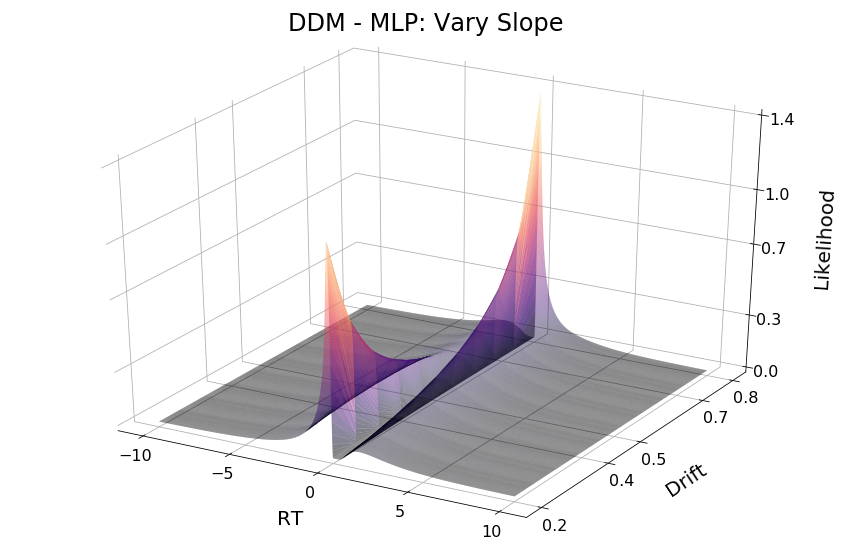

In [55]:
# Predict
plt.rcParams['figure.figsize'] = [15.0, 10.0]
fig = plt.figure()
#fig, (ax1, ax2) = plt.subplot(121)
# ax1 = fig.gca(projection = '3d')
# ax2 = fig.gca(projection = '3d')
axes = []
axes.append(fig.add_subplot(1,1,1, projection = '3d'))

axes[0].plot_trisurf(data_var_v[:, -2] * data_var_v[:, -3], 
                     data_var_v[:, 2], 
                     data_var_v[:, -1], 
                     linewidth = 0.2, alpha = 0.5, cmap = plt.cm.magma)
axes[0].set_ylabel('Drift',  
                   fontsize = 20, labelpad = 20)
axes[0].set_xlabel('RT',  
                   fontsize = 20, labelpad = 20)
axes[0].set_zlabel('Likelihood',  
                   fontsize = 20, labelpad = 20)
axes[0].set_zticks(np.round(np.linspace(0, max(data_var_v[:, -1]), 5), 
                            1))

axes[0].set_yticks(np.round(np.linspace(min(data_var_v[:, 2]), max(data_var_v[:, 2]), 5),
                            1))

axes[0].set_xticks(np.round(np.linspace(min(data_var_v[:, -2] * data_var_v[:, -3]), 
                                        max(data_var_v[:, -2] * data_var_v[:, -3]), 
                                        5), 
                            1))
axes[0].tick_params(labelsize = 16)
#axes[0].set_yticklabels(fontsize = 16)
#axes[0].set_zticklabels(fontsize = 16)

axes[0].set_title('DDM - MLP: Vary Slope', 
                  fontsize = 24, pad = 20)
axes[0].w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axes[0].w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axes[0].w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

In [56]:
# Data template
plot_data = np.zeros((4000, 2))
plot_data[:, 0] = np.concatenate(([i * 0.005 for i in range(2000, 0, -1)], [i * 0.005 for i in range(1, 2001, 1)]))
plot_data[:, 1] = np.concatenate((np.repeat(-1, 2000), np.repeat(1, 2000)))
    
n_levels = 10
n_params = 4
data_var_v = np.zeros((4000 * n_levels, n_params + 3))

cnt = 0 
for ndt_tmp in np.linspace(0, 2, n_levels):
    tmp_begin = 4000 * cnt
    tmp_end = 4000 * (cnt + 1)
    data_var_v[tmp_begin:tmp_end, :4] = np.array([0, 1.5, 0.5, ndt_tmp])
    data_var_v[tmp_begin:tmp_end, 4:(4 + 2)] = plot_data
    data_var_v[tmp_begin:tmp_end, (4 + 2)] = np.squeeze(np.exp(keras_model.predict(data_var_v[tmp_begin:tmp_end, :-1])))
    cnt += 1

In [79]:
# Predict
def mlp_manifold(params = [],
                 vary_idx = [],
                 vary_range = [],
                 vary_name = [],
                 n_levels = 25,
                 network_dir = [],
                 save = True,
                 show = True,
                 title = 'MLP Manifold',
                 model = 'ddm',
                ):

    # Load Keras model and initialize batch container
    keras_model = keras.models.load_model(network_dir + 'model_final.h5')

    # Prepare data structures
    # Data template
    plot_data = np.zeros((4000, 2))
    plot_data[:, 0] = np.concatenate(([i * 0.005 for i in range(2000, 0, -1)], [i * 0.005 for i in range(1, 2001, 1)]))
    plot_data[:, 1] = np.concatenate((np.repeat(-1, 2000), np.repeat(1, 2000)))

    n_params = 4
    data_var = np.zeros((4000 * n_levels, len(params) + 3))

    cnt = 0 
    for par_tmp in np.linspace(vary_range[0], vary_range[1], n_levels):
        tmp_begin = 4000 * cnt
        tmp_end = 4000 * (cnt + 1)
        params[vary_idx] = par_tmp
        data_var[tmp_begin:tmp_end, :len(params)] = params
        data_var[tmp_begin:tmp_end, len(params):(len(params) + 2)] = plot_data
        data_var[tmp_begin:tmp_end, (len(params) + 2)] = np.squeeze(np.exp(keras_model.predict(data_var[tmp_begin:tmp_end, :-1])))
        cnt += 1

    plt.rcParams['figure.figsize'] = [15.0, 10.0]

#fig, ax = plt.subplots(nrows = 3, ncols = 3)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')

#ax[1,1].remove()
#ax[1,1]=fig.add_subplot(2,2,4,projection='3d')

#ax[0] = fig.gca(projection = '3d')
# ax[0].remove()
# ax[0] = fig.add_subplot(1, 2, 1, projection = '3d')
# ax[1].remove()
# ax[1] = fig.add_subplot(1, 2, 2, projection = '3d')
#ax[1] = fig.gca(projection = '3d')
#axes = []
#axes.append(fig.add_subplot(1,2,1, projection = '3d'))
#ax = fig.add_subplot(2, 1, 1, projection = '3d')
# cnt = 1
# for j in range(3):
#     for i in range(3):

#         ax.remove()
#         ax = fig.add_subplot(3, 3, cnt, projection = '3d')

    ax.plot_trisurf(data_var_v[:, -2] * data_var_v[:, -3], 
                         data_var_v[:, 3], 
                         data_var_v[:, -1], 
                         linewidth = 0.2, alpha = 0.5, cmap = plt.cm.magma)
    ax.set_ylabel('Drift',  
                       fontsize = 20, labelpad = 20)
    ax.set_xlabel('RT',  
                       fontsize = 20, labelpad = 20)
    ax.set_zlabel('Likelihood',  
                       fontsize = 20, labelpad = 20)
    ax.set_zticks(np.round(np.linspace(0, max(data_var_v[:, -1]), 5), 
                                1))

    ax.set_yticks(np.round(np.linspace(min(data_var_v[:, 3]), max(data_var_v[:, 3]), 5),
                                1))

    ax.set_xticks(np.round(np.linspace(min(data_var_v[:, -2] * data_var_v[:, -3]), 
                                            max(data_var_v[:, -2] * data_var_v[:, -3]), 
                                            5), 
                                1))
    ax.tick_params(labelsize = 16)
    #axes[0].set_yticklabels(fontsize = 16)
    #axes[0].set_zticklabels(fontsize = 16)




    ax.set_title(model.upper() + ' - MLP: Manifold', 
                      fontsize = 24, pad = 20)
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    plt.savefig('./figures/mlp_manifold_test.png', dpi = 150)
    plt.show()

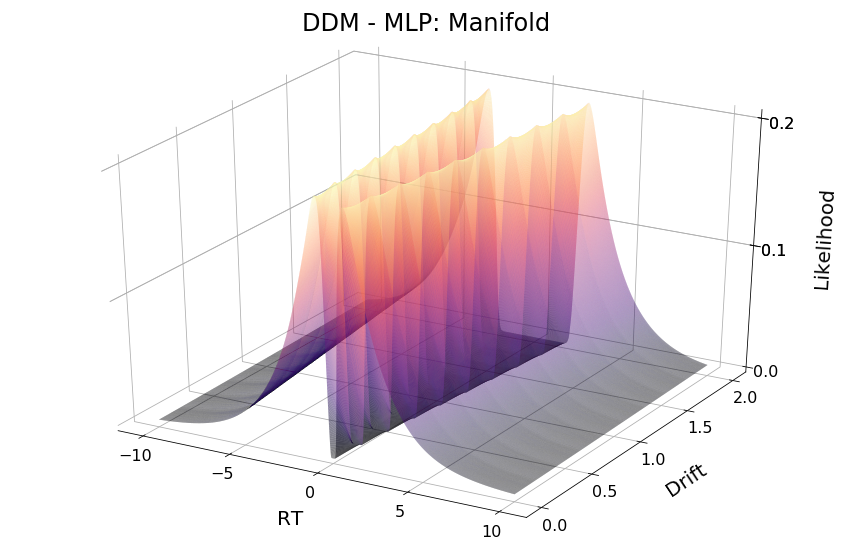

In [80]:
mlp_manifold(params = [0, 1.5, 0.5, 1],
             vary_idx = 0,
             vary_range = [-2, 2],
             vary_name = 'v',
             n_levels = 20,
             network_dir = network_path,
             save = True,
             show = True,
             title = 'MLP Manifold')

In [ ]:
# Predict
# plt.rcParams['figure.figsize'] = [15.0, 10.0]
# fig = plt.figure()
# #fig, (ax1, ax2) = plt.subplot(121)
# # ax1 = fig.gca(projection = '3d')
# # ax2 = fig.gca(projection = '3d')
# axes = []
# axes.append(fig.add_subplot(1,1,1, projection = '3d'))

# axes[0].plot_trisurf(data_var_v[:, -2] * data_var_v[:, -3], 
#                      data_var_v[:, 2], 
#                      data_var_v[:, -1], 
#                      linewidth = 0.2, alpha = 0.5, cmap = plt.cm.magma)
# axes[0].set_ylabel('Drift',  
#                    fontsize = 20, labelpad = 20)
# axes[0].set_xlabel('RT',  
#                    fontsize = 20, labelpad = 20)
# axes[0].set_zlabel('Likelihood',  
#                    fontsize = 20, labelpad = 20)
# axes[0].set_zticks(np.round(np.linspace(0, max(data_var_v[:, -1]), 5), 
#                             1))

# axes[0].set_yticks(np.round(np.linspace(min(data_var_v[:, 2]), max(data_var_v[:, 2]), 5),
#                             1))

# axes[0].set_xticks(np.round(np.linspace(min(data_var_v[:, -2] * data_var_v[:, -3]), 
#                                         max(data_var_v[:, -2] * data_var_v[:, -3]), 
#                                         5), 
#                             1))
# axes[0].tick_params(labelsize = 16)
# #axes[0].set_yticklabels(fontsize = 16)
# #axes[0].set_zticklabels(fontsize = 16)

# axes[0].set_title('DDM - MLP: Vary Slope', 
#                   fontsize = 24, pad = 20)
# axes[0].w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# axes[0].w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# axes[0].w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

In [3]:
# # Generate data -- choice probabilities 
# # v_vals = np.arange(-3, 3, 0.1)
# # a_vals = np.arange(0.1, 3, 0.1)
# # w_vals = np.arange(0.1, 0.9, 0.1)


# # data = []
# # for w in v_vals:
# #     for v in v_vals:
# #         for a in a_vals:        
# #             dataset,_, __ = mdw.make_data_rt_choice(v_range = [v,v], # uniform [0.6, 0.6]
# #                                                     a_range = [a, a], # unifor
# #                                                     w_range = [w, w],  # uniform
# #                                                     n_samples = 1,
# #                                                     write_to_file = False)
# #             data.append(dataset)
        
# # dataset = pd.concat(data)

# # Vary a
# w = 0.5
# v = 0
# a_vals = np.arange(0.5, 3, 0.05)
# rt_vals = np.arange(-5, 5, 0.005)
# dataset_a = pd.DataFrame(columns = ['v','a','w','rt', 'nf_likelihood' ])

# cnt = 0
# for a in a_vals:
#     for rt in rt_vals:
#         likelihood = mdw.fptd(t = rt,
#                               a = a,
#                               v = v,
#                               w = w, 
#                               eps = 1e-29)
#         dataset_a.loc[cnt] = [v, a, w, rt, likelihood]
#         if cnt % 1000 == 0:
#             print(cnt)
#         cnt += 1
         
# # Vary w
# w_vals = np.arange(0.1, 0.9, 0.05)
# v = 0
# a = 2
# rt_vals = np.arange(-5, 5, 0.005)
# dataset_w = pd.DataFrame(columns = ['v','a','w','rt', 'nf_likelihood' ])

# cnt = 0
# for w in w_vals:
#     for rt in rt_vals:
#         likelihood = mdw.fptd(t = rt,
#                               a = a,
#                               v = v,
#                               w = w, 
#                               eps = 1e-29)
#         dataset_w.loc[cnt] = [v, a, w, rt, likelihood]
#         if cnt % 1000 == 0:
#             print(cnt)
#         cnt += 1

# # Vary v 
# w = 0.5
# v_vals = np.arange(-3, 3, 0.05)
# a = 2
# rt_vals = np.arange(-5, 5, 0.005)
# dataset_v = pd.DataFrame(columns = ['v','a','w','rt', 'nf_likelihood' ])

# cnt = 0
# for v in v_vals:
#     for rt in rt_vals:
#         likelihood = mdw.fptd(t = rt,
#                               a = a,
#                               v = v,
#                               w = w, 
#                               eps = 1e-29)
#         dataset_v.loc[cnt] = [v, a, w, rt, likelihood]
#         if cnt % 1000 == 0:
#             print(cnt)
#         cnt += 1

Text(0.5,0.92,'WFPT: Vary barrier distance')

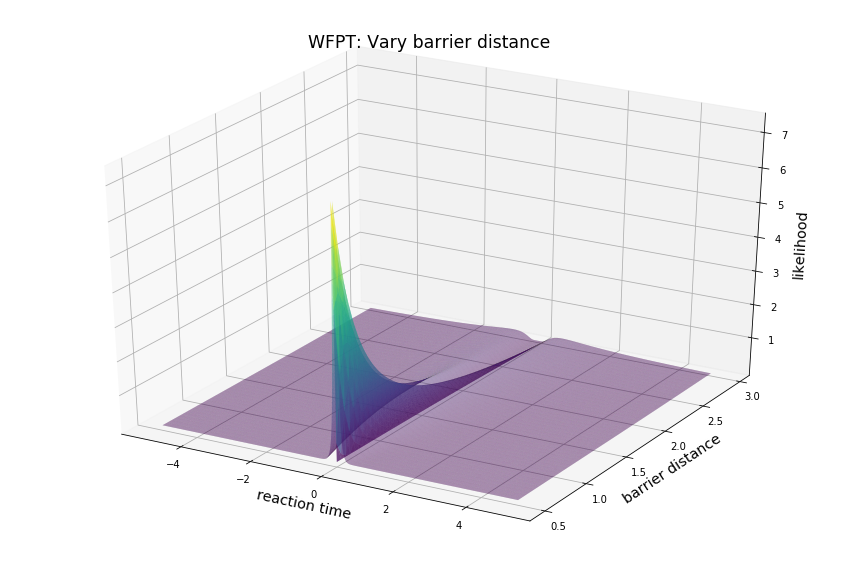

In [7]:
# Predict
plt.rcParams['figure.figsize'] = [15.0, 10.0]
fig = plt.figure()
#fig, (ax1, ax2) = plt.subplot(121)
# ax1 = fig.gca(projection = '3d')
# ax2 = fig.gca(projection = '3d')
axes = []
axes.append(fig.add_subplot(1,1,1, projection = '3d'))

# #ax.plot_trisurf(data['x'], data['y'], data['z'], cmap = plt.cm.viridis, linewidth = 0.2, alpha = 0.1)
axes[0].plot_trisurf(dataset_a['rt'], 
                     dataset_a['a'], 
                     dataset_a['nf_likelihood'], 
                     linewidth = 0.2, alpha = 0.5, cmap = plt.cm.viridis)
axes[0].set_ylabel('barrier distance',  fontsize = 'x-large')
axes[0].set_xlabel('reaction time',  fontsize = 'x-large')
axes[0].set_zlabel('likelihood',  fontsize = 'x-large')
axes[0].set_title('WFPT: Vary barrier distance', fontsize = 'xx-large')

Text(0.5,0.92,'WFPT: Vary starting bias')

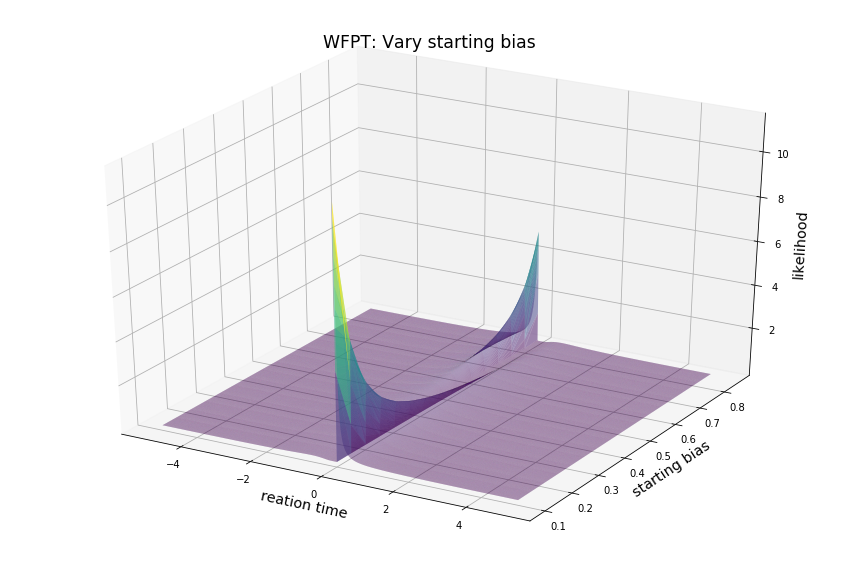

In [9]:
# Predict
plt.rcParams['figure.figsize'] = [15.0, 10.0]
fig = plt.figure()
#fig, (ax1, ax2) = plt.subplot(121)
# ax1 = fig.gca(projection = '3d')
# ax2 = fig.gca(projection = '3d')
axes = []
axes.append(fig.add_subplot(1,1,1, projection = '3d'))

# #ax.plot_trisurf(data['x'], data['y'], data['z'], cmap = plt.cm.viridis, linewidth = 0.2, alpha = 0.1)
axes[0].plot_trisurf(dataset_w['rt'], 
                     dataset_w['w'], 
                     dataset_w['nf_likelihood'], 
                     linewidth = 0.2, alpha = 0.5, cmap = plt.cm.viridis)
axes[0].set_ylabel('starting bias',  fontsize = 'x-large')
axes[0].set_xlabel('reation time',  fontsize = 'x-large')
axes[0].set_zlabel('likelihood',  fontsize = 'x-large')
axes[0].set_title('WFPT: Vary starting bias', fontsize = 'xx-large')

Text(0.5,0.92,'WFPT: Vary drift')

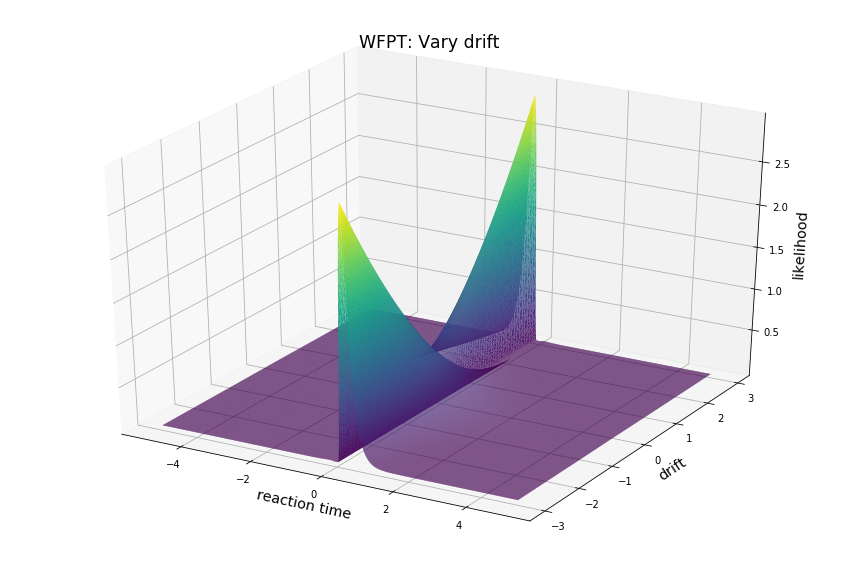

In [11]:
# Predict
plt.rcParams['figure.figsize'] = [15.0, 10.0]
fig = plt.figure()
#fig, (ax1, ax2) = plt.subplot(121)
# ax1 = fig.gca(projection = '3d')
# ax2 = fig.gca(projection = '3d')
axes = []
axes.append(fig.add_subplot(1,1,1, projection = '3d'))

# #ax.plot_trisurf(data['x'], data['y'], data['z'], cmap = plt.cm.viridis, linewidth = 0.2, alpha = 0.1)
axes[0].plot_trisurf(dataset_v['rt'], 
                     dataset_v['v'], 
                     dataset_v['nf_likelihood'], 
                     linewidth = 0.5, alpha = 1, cmap = plt.cm.viridis)
axes[0].set_ylabel('drift',  fontsize = 'x-large')
axes[0].set_xlabel('reaction time',  fontsize = 'x-large')
axes[0].set_zlabel('likelihood',  fontsize = 'x-large')
axes[0].set_title('WFPT: Vary drift', fontsize = 'xx-large')

In [5]:
np.linspace(0,1,100).shape

(100,)

In [81]:
np.log2(131000)

16.99920728619954